## 형태소 빈도 계수

> 형태소 분석이 이루어진 텍스트 데이터에 대해서 `Counter` 클래스를 이용하여 문서에서 등장한 각 형태소별 빈도를 계산할 수 있다.


Counter 클래스를 이용하여 빈도를 계산해보자!

In [2]:
## using Counter
from collections import Counter
colors = ['red', 'blue', 'red', 'green', 'blue', 'blue'] 
color_no = Counter(colors)
color_no

Counter({'red': 2, 'blue': 3, 'green': 1})

* Counter 클래스란 무엇인가?

> 텍스트분석에서는 빈도 계수에 특화된 자료 구조로 collections 모듈에서 제공하는 `Counter 클래스`가 자주 된다.
> Counter 클래스를 사용하기 위해서는 먼저 collections 모듈에서 Counter 클래스를 불러온다. 
이때 collections는 아나콘다에 이미 포함된 모듈이기 때문에 별도로 설치하지 않아도 불러오기가 가능하다.
> Counter 는 collections 아래에 정의된 하위 클래스로, 리스트나 튜플에서 각 데이터가 등장한 횟수를 계산한 뒤 사전 형식으로 돌려준다. 

* Counter 클래스의 `most_common()` 메소드는 등장한 횟수를 내림차순으로 정리하여 다음과 같이 보여준다.

> most_common() 메소드를 사용하면 리스트로 반환해 준다. 리스트(list)를 구성하는 요소들은 튜플(tuple)인데, 각 튜플의 첫 번째 요소는 numbers에 등장하는 숫자이고, 두 번째 요소는 각 숫자가 등장한 횟수이다. 

사전 형식 말고 리스트로 출력해서 하나씩 꺼내서 보고 싶다면? => `most_common()`으로 등장한 횟수 내림차순으로 출력!

In [3]:
numbers = [100, 200, 300, 300, 400, 400, 400, 500, 500] 

num = Counter(numbers) 

num.most_common() 

[(400, 3), (300, 2), (500, 2), (100, 1), (200, 1)]

이렇게 하나씩 꺼내서 볼 수 있어 참 좋다:-)

In [4]:
for number, freq in num.most_common():
    print(number, freq)

400 3
300 2
500 2
100 1
200 1


## 예제 적용
>상품 리뷰에 대해 형태소 분석 후, 주요 품사의 형태소만 선택하고 그 빈도를 계산해보자

In [8]:
from collections import Counter
import ujson

POS_KEY = "review_pos"
FEATURE_POS = ["Noun", "Verb", "Adverb", "Adjective", "Exclamation", "Determiner"]

def is_feature_pos(pos):  
    """주어진 품사의 주요 품사 여부(FEATURE_POS)를 판단하여 돌려준다."""
    
    if pos in FEATURE_POS:
        return True
    
    return False

def feature_pos(pos_anals):  
    """주어진 형태소 분석 결과 리스트에서 필요한 형태소만 골라서 돌려준다."""
    
    pos_anals = [(word, pos) for word, pos in pos_anals if is_feature_pos(pos)]
    
    return pos_anals

def main():      
    """한국어 상품평의 주요 품사 형태소 빈도를 계수한다."""
    
    pos_freq = Counter()
    input_file_name = r"pos_movie.txt"

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            doc = ujson.loads(line)
            for sent_ma in doc[POS_KEY]:
                sent_ma = feature_pos(sent_ma)
                pos_freq.update(sent_ma)
            
    for (word, pos), freq in pos_freq.most_common(20):     
        """빈도 계수 높은 순으로 20개만 출력한다."""
        print("{}\t{}\t{}".format(word, pos, freq))

# 실행

main()

영화	Noun	927
연기	Noun	247
배우	Noun	206
정말	Noun	192
진짜	Noun	172
스토리	Noun	165
너무	Adverb	158
평점	Noun	140
점	Noun	125
최고	Noun	121
유해진	Noun	118
이	Noun	116
다	Adverb	109
보고	Noun	104
생각	Noun	102
정도	Noun	92
이	Determiner	86
감독	Noun	84
것	Noun	83
돈	Noun	82


# 특징변수 시각화

## 워드 클라우드
가장 직관적으로 어휘 빈도를 시각화할 수 있는 방법으로 `워드 클라우드`가 있다. 
>파이썬을 이용하여 워드 클라우드를 그릴 수 있는 라이브러리가 여러 가지 존재하지만 `from wordcloud import WordCloud`를 이용해 워드클라우드를 그린다.

In [9]:
"""상품 리뷰에 대해 형태소 분석 후 주요 품사의 형태소만 선택한 뒤 빈도 역순으로 정렬 뒤 형태소, 빈도수 파일 저장"""

from collections import Counter
from operator import itemgetter
import ujson

POS_KEY = "review_pos"
FEATURE_POS = ["Noun", "Verb", "Adverb", "Adjective", "Exclamation", "Determiner"]

def feature_pos(pos_anals):  
    """주어진 형태소 분석 결과 리스트에서 필요한 형태소만 골라서 돌려준다."""
    
    pos_anals = [(word, pos) for word, pos in pos_anals if is_feature_pos(pos)]
    
    return pos_anals

def is_feature_pos(pos):  
    """주어진 품사의 주요 품사 여부(FEATURE_POS)를 판단하여 돌려준다."""
    
    if pos in FEATURE_POS:
        return True
    
    return False

def main():      
    """한국어 상품평의 주요 품사 형태소 빈도를 계수한다."""
    
    pos_freq = Counter()
    input_file_name = r"pos_movie.txt"
    output_file_name = r"counts_pos_movie.txt"

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in input_file:
            doc = ujson.loads(line)
            for sent_ma in doc[POS_KEY]:
                sent_ma = feature_pos(sent_ma)
                pos_freq.update(sent_ma)
                  
    pos_counts = [(word, pos, freq) for (word, pos), freq in pos_freq.items()]
    sorted_pos_counts = sorted(pos_counts, key=itemgetter(2), reverse=True)     # 빈도 역순으로 정렬
    
    with open(output_file_name, "w", encoding="utf-8") as output_file:        
            for word, pos, freq in sorted_pos_counts[0:50]:                    # 상위 빈도 50까지만 저장 
                print("{}\t{}".format(word, freq), file = output_file)         # 파일에는 각 형태소와 그 빈도만 저장
    
# 실행

main()


* `WordCloud()` 실행 시, font/크기/배경색 지정해준다. 배경색 default는 검정색이다!
* `generate_from_frequencies()`에는 단어 빈도 사전을 넣어준다. 단어 빈도 사전이란 아래와 같은 것...!

In [29]:
with open(input_file_name, "r", encoding="utf-8") as input_file:
      
    keywords = {}
    for line in input_file:
        line = line.rstrip().split("\t")
        word, freq = line
        keywords[word] = int(freq)
print(keywords)

{'영화': 927, '연기': 247, '배우': 206, '정말': 192, '진짜': 172, '스토리': 165, '너무': 158, '평점': 140, '점': 125, '최고': 121, '유해진': 118, '이': 86, '다': 109, '보고': 104, '생각': 102, '정도': 92, '감독': 84, '것': 83, '돈': 82, '그냥': 80, '황정민': 76, '말': 76, '하나': 75, '더': 72, '알바': 68, '다시': 67, '사람': 67, '이런': 67, '재미': 66, '잘': 65, '처음': 65, '시간': 65, '하는': 61, '왜': 61, '때': 60, '연기력': 58, '내': 58, '봤는데': 58, '없는': 57, '중간': 57, '수': 56, '없고': 54, '한국영': 54, '한': 53, '한국': 53, '봐도': 53, '입니다': 52, '거': 51, '할': 51}


* wordcloud 생성 후, pyplot으로 시각화 해주면 끝이다. 간단하다:-)

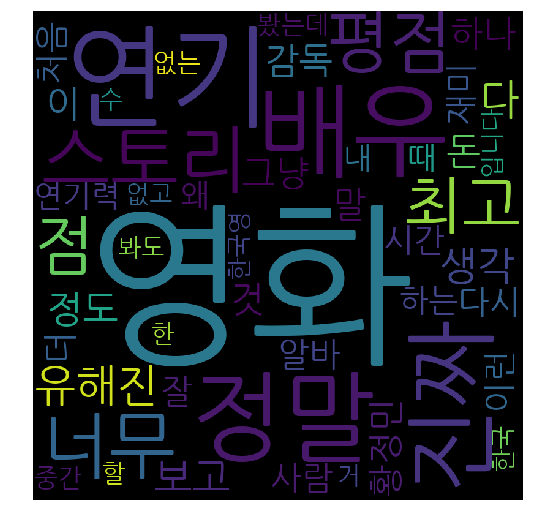

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_file_name = r"counts_pos_movie.txt"

with open(input_file_name, "r", encoding="utf-8") as input_file:
      
    keywords = {}
    for line in input_file:
        line = line.rstrip().split("\t")
        word, freq = line
        keywords[word] = int(freq)

wordcloud = WordCloud()
font_path = 'C:/Users/pj903/Text_Mining/수업자료/NanumGothic.ttf'
#배경색이 default가 검정
#wordcloud = WordCloud(font_path = font_path,width = 800, height = 800)
wordcloud = WordCloud(font_path = font_path,width = 800, height = 800, background_color="white")


wordcloud = wordcloud.generate_from_frequencies(keywords)

fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#fig.savefig('word_cloud_black.png')
#fig.savefig('word_cloud_white.png')